In [4]:
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import qgis.core
import pprint
import glob
from pyspark import SparkContext, SparkConf

In [5]:
coconut_path = "individual-trees/tree0.jpg"

In [6]:
papaya_path = "individual-tree-jpg/carica-papaya/papaya12.jpg"

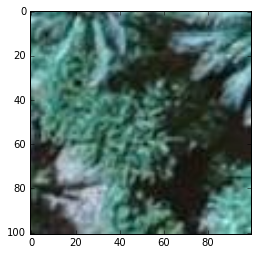

In [7]:
%matplotlib inline
tree = cv2.imread(coconut_path)
tree2 = cv2.imread(papaya_path)

plt.imshow(tree2)

In [8]:
print tree2.shape

(101, 100, 3)


In [9]:
x = []
for name in (os.listdir("automated-clips/cocos")):
    if ("xml" not in name) and ("dominokeep" not in name):       
        sb = "automated-clips/cocos/"+name
        a = cv2.imread(sb)
        x.append(a)
        
b = len(x)
print b

for name in (os.listdir("automated-clips/musa")):
    if ("xml" not in name) and ("dominokeep" not in name):       
        sb = "automated-clips/musa/"+name
        a = cv2.imread(sb)
        x.append(a)

for name in (os.listdir("automated-clips/mango")):
    if ("xml" not in name) and ("dominokeep" not in name):       
        sb = "automated-clips/mango/"+name
        a = cv2.imread(sb)
        x.append(a)

for name in (os.listdir("automated-clips/papaya")):
    if ("xml" not in name) and ("dominokeep" not in name):       
        sb = "automated-clips/papaya/"+name
        a = cv2.imread(sb)
        x.append(a)



c = len(x)
print(c)


3000
6079


In [10]:
type(x[1350])

numpy.ndarray

In [11]:
for i in range(0,len(x)):
    if type(x[i]) != type(x[0]):
        print i

In [12]:
x = np.asarray(x)
x = np.stack(x)

y = [1]*(b) + [0]*((c)-(b))
y = np.asarray(y)

print(x.shape)
print(y.shape)


(6079, 101, 100, 3)
(6079,)


In [13]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
model = Sequential()
model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(101,100,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(101,100,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(101,100,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, 3, 3, activation='relu', input_shape=(101,100,3)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [15]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 99, 98, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 49, 49, 32)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 47, 47, 32)    9248        maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 23, 23, 32)    0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [16]:
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
model.fit(x_train, y_train,
          batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
4255/4255 [==============================] - 70s - loss: 0.6869 - acc: 0.5422    
Epoch 2/10
4255/4255 [==============================] - 58s - loss: 0.5996 - acc: 0.6813    
Epoch 3/10
4255/4255 [==============================] - 58s - loss: 0.5184 - acc: 0.7666    
Epoch 4/10
4255/4255 [==============================] - 58s - loss: 0.4360 - acc: 0.8284    
Epoch 5/10
4255/4255 [==============================] - 58s - loss: 0.4079 - acc: 0.8390    
Epoch 6/10
4255/4255 [==============================] - 58s - loss: 0.3959 - acc: 0.8515    
Epoch 7/10
4255/4255 [==============================] - 58s - loss: 0.3665 - acc: 0.8660    
Epoch 8/10
4255/4255 [==============================] - 58s - loss: 0.3457 - acc: 0.8759    
Epoch 9/10
4255/4255 [==============================] - 58s - loss: 0.3228 - acc: 0.8776    
Epoch 10/10
4255/4255 [==============================] - 58s - loss: 0.3375 - acc: 0.8726    


In [18]:
prediction = model.predict(x_test)

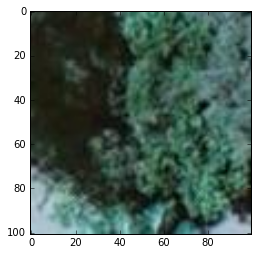

In [19]:
%matplotlib inline
plt.imshow(x_test[705])

[ 0.03992775]


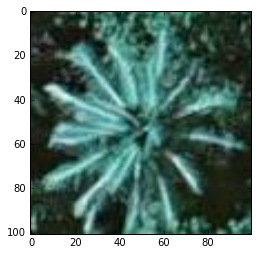

In [20]:
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)
print(prediction[41])

definitelynotcoco = np.argmin(prediction)
definitelycoco = np.argmax(prediction)

plt.imshow(x_test[np.argmin(prediction)])
plt.imshow(x_test[np.argmax(prediction)])

In [49]:
from sklearn.metrics import confusion_matrix

y_pred = prediction > 0.5

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

tpr = float(tp)/(float(tp)+float(fn))
fpr = float(fp)/(float(fp)+float(tn))
acc = (float(tp) + float(tn))/(float(fp)+float(tn)+float(tp)+float(fn))

acc

0.8843201754385965

In [51]:
import pandas as pd
out = pd.DataFrame(columns=['method','accuracy','truepos','trueneg','falsepos','falseneg'],index=[1])
out.iloc[0]['method']='Convolutional Neural Net'; out.iloc[0]['accuracy']=acc; out.iloc[0]['truepos']=tp; out.iloc[0]['falsepos']=fp; out.iloc[0]['trueneg'] = tn; out.iloc[0]['falseneg'] = fn
out


,method,accuracy,truepos,trueneg,falsepos,falseneg
1,Convolutional Neural Net,0.88432,807,806,132,79
